In [90]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model, Sequential
from time import time
from collections import Counter

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

/tmp/ipykernel_4569/2401666654.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


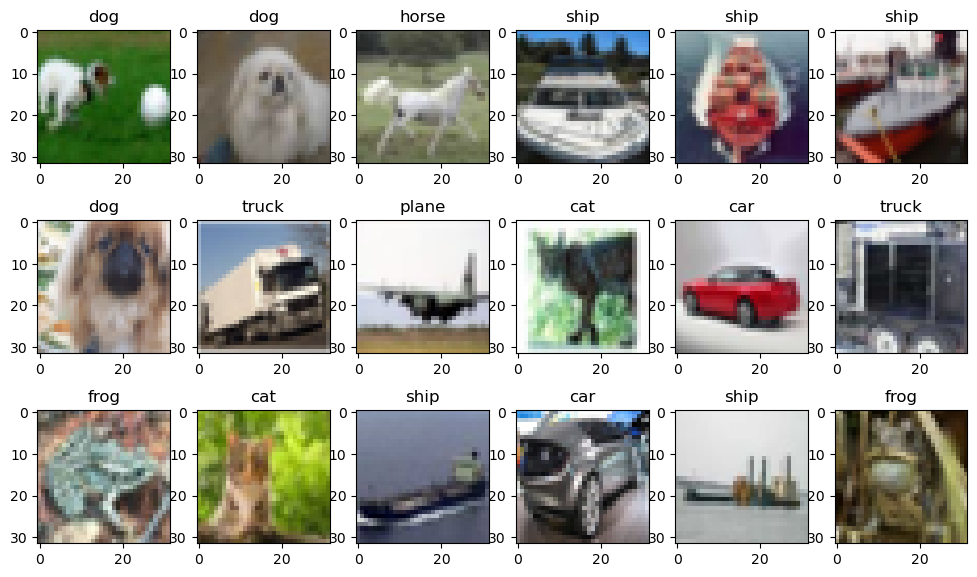

In [80]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

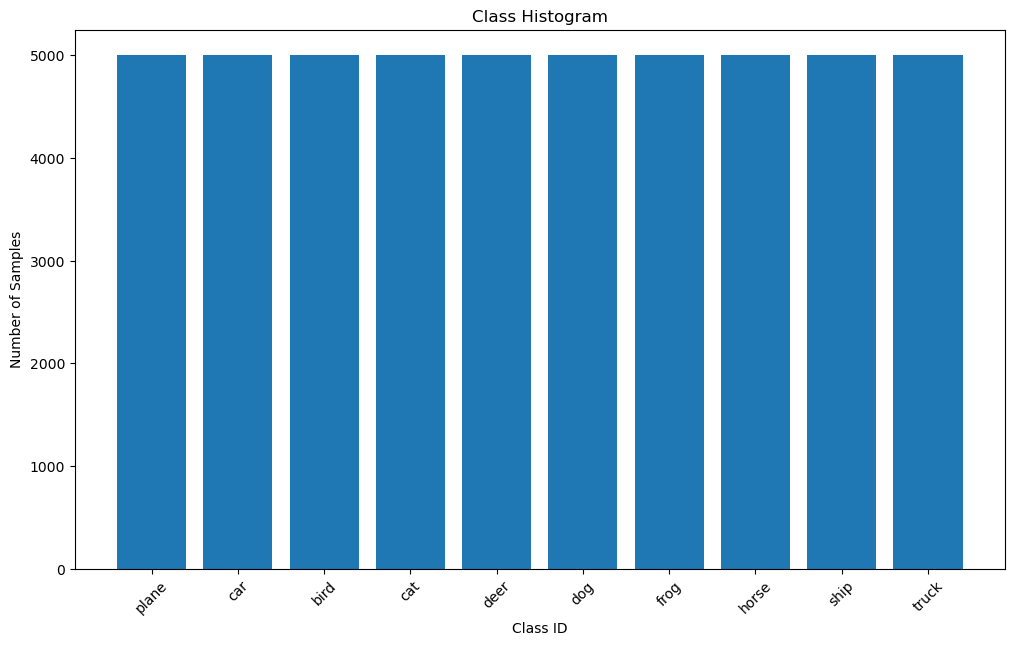

In [81]:
# Assuming y_train contains the class labels
histogram = Counter(y_train.flatten())

# Plotting the histogram
plt.bar(histogram.keys(), histogram.values())
plt.xlabel('Class ID')
plt.ylabel('Number of Samples')
plt.title('Class Histogram')
plt.xticks(list(range(10)), [classes[i] for i in range(10)], rotation=45)
plt.show()

In [82]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding for labels
num_classes = len(classes)
y_train = tf.one_hot(y_train.flatten(), depth=num_classes)
y_test = tf.one_hot(y_test.flatten(), depth=num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [83]:
input_shape = (size, size, 3)

# Build the classifier
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.45))

#Third convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fifth convolutional layer
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.6))

# Flatten layer
model.add(Flatten())

# First fully connected layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.75))

# Output layer with 10 neurons
model.add(Dense(10, activation='softmax'))

# Show the model
model.summary()

/home/dmitry/anaconda3/envs/CV/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 7, 7, 16)       │        36,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 7, 7, 16)       │            64 │
│ (BatchNormalization)            │                        │             

 Total params: 1,935,770 (7.38 MB)

 Trainable params: 1,933,434 (7.38 MB)

 Non-trainable params: 2,336 (9.12 KB)

In [84]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training
epochs = 25
batch_size = 128

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time:', time() - start)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - accuracy: 0.2285 - loss: 2.5302 - val_accuracy: 0.1374 - val_loss: 3.0531
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.4506 - loss: 1.4854 - val_accuracy: 0.5240 - val_loss: 1.3373
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 72s 206ms/step - accuracy: 0.5727 - loss: 1.1987 - val_accuracy: 0.6570 - val_loss: 0.9843
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 208ms/step - accuracy: 0.6468 - loss: 1.0110 - val_accuracy: 0.7066 - val_loss: 0.8817
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 208ms/step - accuracy: 0.6998 - loss: 0.8797 - val_accuracy: 0.6916 - val_loss: 0.9256
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 209ms/step - accuracy: 0.7395 - loss: 0.7782 - val_accuracy: 0.6984 - val_loss: 0.9085
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 208ms/step - accuracy: 0.7656 - loss: 0.6948 - val_accuracy: 0.7640 - val_loss: 0.6899
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 207ms/step - accuracy: 0.7901 - loss: 0

Train Acc      0.9426222443580627
Validation Acc 0.8515999913215637


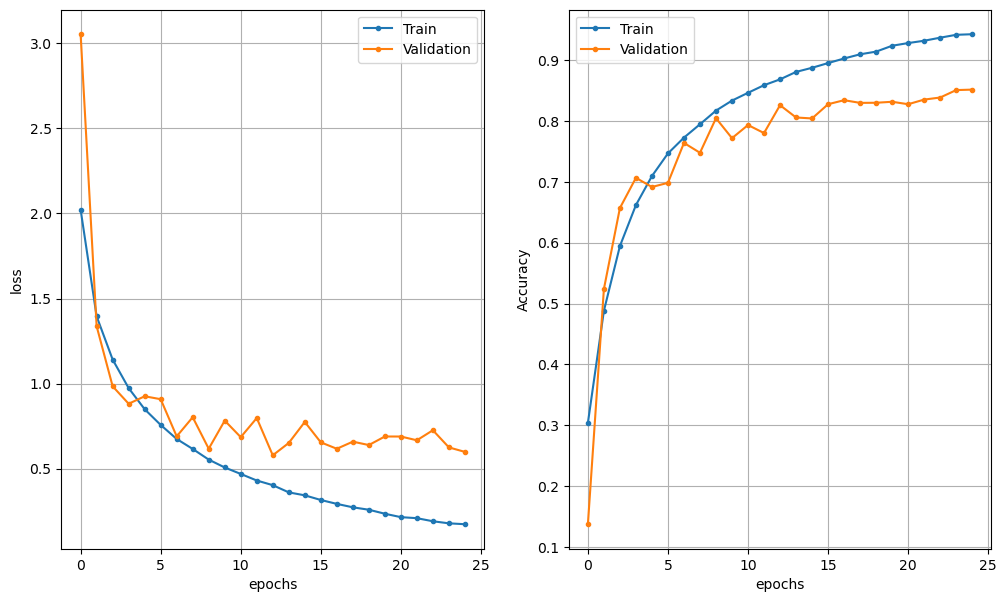

In [85]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

In [97]:
# Compute the labels and the predictions as sparse values
y_true = tf.argmax(y_test, axis=1).numpy().flatten()
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [98]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    class_indices = np.where(y_true == class_id)[0]
    class_correct = np.sum(y_true[class_indices] == y_pred[class_indices])
    acc = class_correct / len(class_indices) if len(class_indices) > 0 else 0
    print(f"{class_name}: {acc:.2f}")

plane: 0.87
car: 0.95
bird: 0.81
cat: 0.69
deer: 0.87
dog: 0.74
frog: 0.92
horse: 0.84
ship: 0.89
truck: 0.92


In [99]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8499 - loss: 0.5787
Test loss   0.5850062966346741
Test metric 0.8507000207901001


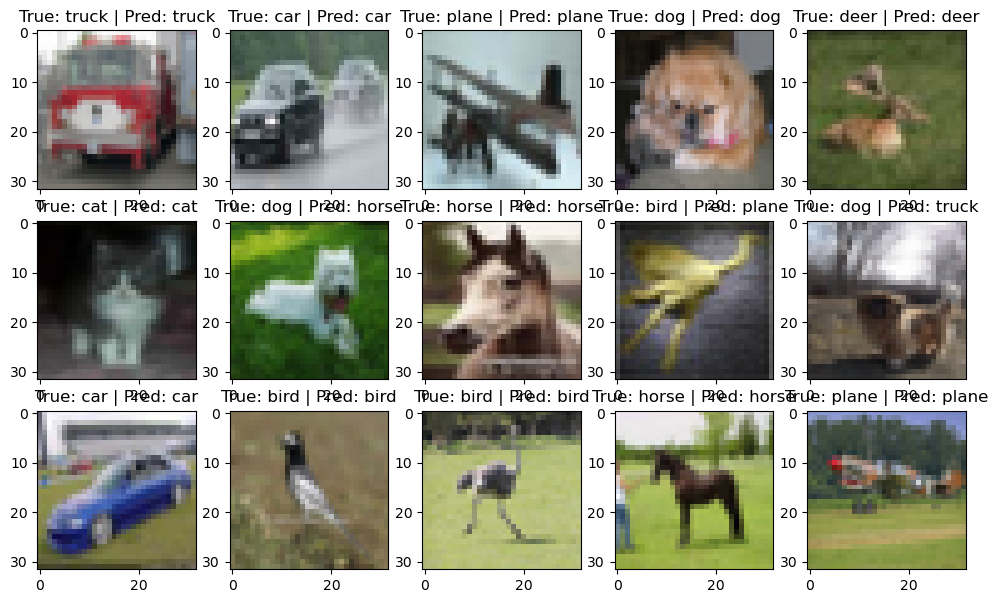

In [100]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test) - 1)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))